In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.metrics import classification_report
from sklearn.metrics import zero_one_loss, coverage_error, label_ranking_loss, label_ranking_average_precision_score
import numpy as np
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

Read train and test data

In [4]:
train_df = pd.read_csv('DeliciousMIL/train-data.csv', header=None)
test_df = pd.read_csv('DeliciousMIL/test-data.csv', header=None)

Read train and test label data

In [5]:
with open('DeliciousMIL/train-label.csv', 'r') as read_obj:
  
    csv_reader = csv.reader(read_obj, delimiter=' ')
  
    # convert string to list
    Y_train = list(csv_reader)
    Y_train = [[int(element) for element in sublist] for sublist in Y_train]
  
    print(Y_train)

with open('DeliciousMIL/test-label.csv', 'r') as read_obj:
  
    csv_reader = csv.reader(read_obj, delimiter=' ')
  
    # convert string to list
    Y_test = list(csv_reader)
    Y_test = [[int(element) for element in sublist] for sublist in Y_test]

    print(Y_test)

[[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], [0, 1, 

Remove number of sentences and number of words per document

In [6]:
def extract_values(document):    
    pattern = r'^.*?>'
    documentWithoutInd = re.sub(pattern, '', document)

    split_values = documentWithoutInd.split('>')
    split_values = [re.sub(r'<.*$', '', value).strip() for value in split_values]
    split_values = split_values[1:] 

    sentences = ', '.join(split_values)
    
    return str(sentences)

train_df['sentences'] = train_df.iloc[:, 0].apply(lambda x: extract_values(x))
test_df['sentences'] = test_df.iloc[:, 0].apply(lambda x: extract_values(x))


Transform sentences into vectors

In [7]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['sentences'])
X_test = vectorizer.transform(test_df['sentences'])

X_train.shape, X_test.shape

print(X_train)


  (0, 6334)	1
  (0, 5547)	1
  (0, 8116)	2
  (0, 2894)	1
  (0, 6372)	1
  (0, 7835)	1
  (0, 4490)	1
  (0, 4259)	1
  (0, 3678)	1
  (0, 4612)	1
  (0, 3581)	1
  (1, 4612)	1
  (1, 919)	1
  (1, 42)	1
  (1, 8306)	1
  (1, 4252)	1
  (1, 2850)	1
  (1, 5742)	3
  (1, 2101)	1
  (1, 403)	1
  (1, 7626)	1
  (1, 3319)	1
  (1, 7515)	1
  (1, 370)	1
  (1, 2420)	2
  :	:
  (8250, 4612)	1
  (8250, 4021)	1
  (8250, 1995)	1
  (8250, 1834)	1
  (8250, 1160)	1
  (8250, 5003)	1
  (8250, 1803)	1
  (8250, 2720)	1
  (8250, 355)	1
  (8250, 313)	1
  (8250, 5637)	1
  (8250, 703)	1
  (8250, 989)	1
  (8250, 8142)	1
  (8250, 4564)	1
  (8250, 1417)	2
  (8250, 7862)	1
  (8250, 1682)	1
  (8250, 4606)	1
  (8250, 2267)	1
  (8250, 6405)	1
  (8250, 5631)	1
  (8250, 6202)	1
  (8250, 5711)	1
  (8250, 198)	1


Use LogisticRegression on MultiOutputClassifier and ClassifierChain

In [ ]:
names = ['ML', 'CL']
classifiers = [MultiOutputClassifier(LogisticRegression(class_weight='balanced', random_state=123)),
               ClassifierChain(LogisticRegression(random_state=123))
              ]

for name, clf in zip(names, classifiers):
  print(name)
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  print(classification_report(Y_test,Y_pred,zero_division='warn'))
  print('subset accuracy   : %.2f' % (1-zero_one_loss(Y_test, Y_pred)))

  if name == 'CL':
    Y_proba = clf.predict_proba(X_test)
  else:
    Y_proba = np.array([[k[1] for k in i] for i in clf.predict_proba(X_test)]).T

  print('coverage error    : %.2f' % (coverage_error(Y_test, Y_proba)))
  print('ranking loss      : %.2f' % (label_ranking_loss(Y_test, Y_proba)))
  print('average precision : %.2f' % (label_ranking_average_precision_score(Y_test, Y_proba)))

BR


c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       977
           1       0.40      0.50      0.44       228
           2       0.51      0.54      0.53      1558
           3       0.56      0.60      0.58       372
           4       0.49      0.56      0.52      1050
           5       0.30      0.45      0.36       537
           6       0.35      0.41      0.38       702
           7       0.48      0.53      0.50      1079
           8       0.43      0.53      0.48       803
           9       0.41      0.49      0.44       483
          10       0.39      0.52      0.45       507
          11       0.38      0.44      0.41       478
          12       0.33      0.42      0.37       509
          13       0.33      0.46      0.39       355
          14       0.46      0.53      0.49       392
          15       0.36      0.43      0.39       441
          16       0.35      0.42      0.38       269
          17       0.42    

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       977
           1       0.51      0.38      0.44       228
           2       0.52      0.49      0.51      1558
           3       0.65      0.53      0.59       372
           4       0.54      0.51      0.53      1050
           5       0.34      0.34      0.34       537
           6       0.39      0.32      0.35       702
           7       0.54      0.46      0.50      1079
           8       0.47      0.42      0.44       803
           9       0.51      0.40      0.45       483
          10       0.50      0.42      0.46       507
          11       0.46      0.32      0.38       478
          12       0.39      0.31      0.34       509
          13       0.45      0.33      0.38       355
          14       0.57      0.44      0.49       392
          15       0.45      0.31      0.37       441
          16       0.42      0.33      0.37       269
          17       0.54    

Use of LinearSVC and GradientBoostingClassifier models within the frameworks of MultiOutputClassifier and ClassifierChain.

In [42]:
names = ['ML', 'CL', 'MG', 'CG']
linearSVC = CalibratedClassifierCV(LinearSVC(random_state=0, tol=1e-5), method='sigmoid')
classifiers = [MultiOutputClassifier(linearSVC),
               ClassifierChain(linearSVC),
               MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)),
               ClassifierChain( GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))
              ]

for name, clf in zip(names, classifiers):
  print(name)
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  print(classification_report(Y_test,Y_pred,zero_division='warn'))
  print('subset accuracy   : %.2f' % (1-zero_one_loss(Y_test, Y_pred)))

  if name == 'CL' or name == 'CG':
    Y_proba = clf.predict_proba(X_test)
  else:
    Y_proba = np.array([[k[1] for k in i] for i in clf.predict_proba(X_test)]).T

  print('coverage error    : %.2f' % (coverage_error(Y_test, Y_proba)))
  print('ranking loss      : %.2f' % (label_ranking_loss(Y_test, Y_proba)))
  print('average precision : %.2f' % (label_ranking_average_precision_score(Y_test, Y_proba)))

ML


c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarnin

              precision    recall  f1-score   support

           0       0.83      0.37      0.52       977
           1       0.69      0.08      0.14       228
           2       0.63      0.07      0.13      1558
           3       0.81      0.32      0.46       372
           4       0.68      0.16      0.26      1050
           5       0.70      0.01      0.03       537
           6       0.46      0.02      0.05       702
           7       0.71      0.11      0.20      1079
           8       0.57      0.06      0.10       803
           9       0.72      0.10      0.17       483
          10       0.72      0.05      0.10       507
          11       0.79      0.08      0.14       478
          12       0.50      0.00      0.01       509
          13       0.71      0.06      0.10       355
          14       0.67      0.15      0.25       392
          15       0.73      0.04      0.07       441
          16       0.70      0.09      0.15       269
          17       0.70    

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarnin

              precision    recall  f1-score   support

           0       0.83      0.37      0.52       977
           1       0.68      0.08      0.15       228
           2       0.63      0.07      0.13      1558
           3       0.82      0.32      0.46       372
           4       0.68      0.16      0.25      1050
           5       0.48      0.02      0.04       537
           6       0.44      0.02      0.05       702
           7       0.73      0.12      0.21      1079
           8       0.58      0.07      0.13       803
           9       0.69      0.09      0.16       483
          10       0.73      0.06      0.12       507
          11       0.82      0.09      0.16       478
          12       0.43      0.01      0.01       509
          13       0.61      0.05      0.09       355
          14       0.68      0.15      0.25       392
          15       0.70      0.05      0.09       441
          16       0.66      0.09      0.16       269
          17       0.64    

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to contro

              precision    recall  f1-score   support

           0       0.77      0.55      0.64       977
           1       0.42      0.22      0.29       228
           2       0.57      0.34      0.43      1558
           3       0.74      0.50      0.60       372
           4       0.61      0.38      0.47      1050
           5       0.43      0.18      0.25       537
           6       0.42      0.20      0.27       702
           7       0.65      0.35      0.46      1079
           8       0.60      0.27      0.37       803
           9       0.64      0.32      0.43       483
          10       0.60      0.28      0.38       507
          11       0.57      0.14      0.23       478
          12       0.50      0.20      0.28       509
          13       0.57      0.12      0.19       355
          14       0.53      0.20      0.29       392
          15       0.46      0.17      0.25       441
          16       0.44      0.15      0.22       269
          17       0.51    

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to contro

              precision    recall  f1-score   support

           0       0.77      0.55      0.64       977
           1       0.42      0.22      0.29       228
           2       0.58      0.32      0.41      1558
           3       0.74      0.50      0.60       372
           4       0.62      0.36      0.45      1050
           5       0.40      0.16      0.23       537
           6       0.44      0.21      0.29       702
           7       0.65      0.31      0.42      1079
           8       0.63      0.29      0.39       803
           9       0.62      0.30      0.41       483
          10       0.61      0.29      0.39       507
          11       0.57      0.14      0.23       478
          12       0.50      0.16      0.24       509
          13       0.58      0.10      0.16       355
          14       0.53      0.20      0.29       392
          15       0.47      0.17      0.24       441
          16       0.51      0.11      0.18       269
          17       0.52    

Grid search to find the best parameters of GradientBoostingClassifier model within the frameworks of ClassifierChain.

In [47]:
# Create the base classifier
base_classifier = GradientBoostingClassifier()

# Create the ClassifierChain object
classifier_chain = ClassifierChain(base_classifier)

# Define the parameter grid
param_grid = {
    'base_estimator__n_estimators': [200, 300, 500],
    'base_estimator__max_depth': [1,2,3],
    'base_estimator__learning_rate': [0.1, 0.3, 0.5]
}

# Perform grid search
clf = GridSearchCV(classifier_chain, param_grid, cv=3, scoring='accuracy')

# Create and fit the LabelPowerset classifier
clf.fit(X_train, Y_train)

# Access the best parameters and best estimator
best_params = clf.best_params_
best_estimator = clf.best_estimator_

# Make predictions using the best estimator
Y_pred = best_estimator.predict(X_test)

print(best_params)
print(classification_report(Y_test,Y_pred,zero_division='warn'))
print('subset accuracy   : %.2f' % (1-zero_one_loss(Y_test, Y_pred)))

# Y_proba = np.array([[k[1] for k in i] for i in clf.predict_proba(X_test_dense)]).T
Y_proba = clf.predict_proba(X_test)

print('coverage error    : %.2f' % (coverage_error(Y_test, Y_proba)))
print('ranking loss      : %.2f' % (label_ranking_loss(Y_test, Y_proba)))
print('average precision : %.2f' % (label_ranking_average_precision_score(Y_test, Y_proba)))

{'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 3, 'base_estimator__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.81      0.55      0.65       977
           1       0.73      0.27      0.40       228
           2       0.64      0.26      0.37      1558
           3       0.75      0.53      0.62       372
           4       0.76      0.34      0.47      1050
           5       0.54      0.12      0.20       537
           6       0.54      0.13      0.21       702
           7       0.76      0.27      0.40      1079
           8       0.73      0.22      0.34       803
           9       0.70      0.25      0.37       483
          10       0.71      0.26      0.38       507
          11       0.65      0.17      0.26       478
          12       0.65      0.11      0.19       509
          13       0.63      0.19      0.30       355
          14       0.70      0.25      0.37       392
          15       0.64    

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


coverage error    : 7.85
ranking loss      : 0.16
average precision : 0.67


Grid search to find the best parameters of GradientBoostingClassifier model within the frameworks of ClassifierChain and MultiOutputClassifier.

In [48]:
names = ['MG', 'CG']
classifiers = [MultiOutputClassifier(GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0)),
               ClassifierChain( GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0))
              ]

for name, clf in zip(names, classifiers):
  print(name)
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test)
  print(classification_report(Y_test,Y_pred,zero_division='warn'))
  print('subset accuracy   : %.2f' % (1-zero_one_loss(Y_test, Y_pred)))

  if name == 'CG':
    Y_proba = clf.predict_proba(X_test)
  else:
    Y_proba = np.array([[k[1] for k in i] for i in clf.predict_proba(X_test)]).T

  print('coverage error    : %.2f' % (coverage_error(Y_test, Y_proba)))
  print('ranking loss      : %.2f' % (label_ranking_loss(Y_test, Y_proba)))
  print('average precision : %.2f' % (label_ranking_average_precision_score(Y_test, Y_proba)))

MG


c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      0.55      0.65       977
           1       0.73      0.27      0.39       228
           2       0.64      0.26      0.37      1558
           3       0.76      0.53      0.63       372
           4       0.74      0.35      0.47      1050
           5       0.54      0.11      0.18       537
           6       0.52      0.13      0.20       702
           7       0.77      0.29      0.42      1079
           8       0.71      0.23      0.35       803
           9       0.76      0.29      0.42       483
          10       0.70      0.26      0.38       507
          11       0.70      0.19      0.30       478
          12       0.62      0.14      0.22       509
          13       0.66      0.19      0.29       355
          14       0.71      0.29      0.41       392
          15       0.68      0.14      0.24       441
          16       0.55      0.13      0.22       269
          17       0.66    

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      0.55      0.65       977
           1       0.76      0.26      0.39       228
           2       0.64      0.26      0.37      1558
           3       0.76      0.52      0.62       372
           4       0.74      0.34      0.47      1050
           5       0.54      0.11      0.18       537
           6       0.58      0.14      0.23       702
           7       0.75      0.27      0.40      1079
           8       0.73      0.22      0.34       803
           9       0.75      0.28      0.40       483
          10       0.69      0.25      0.37       507
          11       0.67      0.17      0.28       478
          12       0.64      0.12      0.20       509
          13       0.64      0.20      0.31       355
          14       0.74      0.27      0.40       392
          15       0.65      0.13      0.21       441
          16       0.55      0.13      0.21       269
          17       0.70    

Grid search to find the best parameters of LinearSVC model within the framework of ClassifierChain.

In [52]:
classifier_chain = ClassifierChain(
    base_estimator=CalibratedClassifierCV(base_estimator=LinearSVC())
)

# Define the parameter grid
param_grid = {
    'base_estimator__base_estimator__C': [0.1, 1.0, 10.0],
    'base_estimator__base_estimator__tol': [1e-3, 1e-4, 1e-5]
}

# Perform grid search
clf = GridSearchCV(classifier_chain, param_grid, scoring='accuracy')

# Create and fit the LabelPowerset classifier
clf.fit(X_train, Y_train)

# Access the best parameters and best estimator
best_params = clf.best_params_
best_estimator = clf.best_estimator_

# Make predictions using the best estimator
Y_pred = best_estimator.predict(X_test)

print(best_params)
print(classification_report(Y_test,Y_pred,zero_division='warn'))
print('subset accuracy   : %.2f' % (1-zero_one_loss(Y_test, Y_pred)))

# Y_proba = np.array([[k[1] for k in i] for i in clf.predict_proba(X_test_dense)]).T
Y_proba = clf.predict_proba(X_test)

print('coverage error    : %.2f' % (coverage_error(Y_test, Y_proba)))
print('ranking loss      : %.2f' % (label_ranking_loss(Y_test, Y_proba)))
print('average precision : %.2f' % (label_ranking_average_precision_score(Y_test, Y_proba)))

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site

{'base_estimator__base_estimator__C': 0.1, 'base_estimator__base_estimator__tol': 0.0001}
              precision    recall  f1-score   support

           0       0.83      0.44      0.57       977
           1       0.77      0.16      0.27       228
           2       0.64      0.12      0.20      1558
           3       0.82      0.39      0.53       372
           4       0.72      0.23      0.35      1050
           5       0.55      0.05      0.10       537
           6       0.58      0.04      0.08       702
           7       0.72      0.16      0.27      1079
           8       0.65      0.11      0.19       803
           9       0.70      0.15      0.24       483
          10       0.71      0.09      0.17       507
          11       0.75      0.13      0.22       478
          12       0.53      0.02      0.04       509
          13       0.65      0.08      0.15       355
          14       0.70      0.20      0.32       392
          15       0.67      0.07      0.13  

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


coverage error    : 8.12
ranking loss      : 0.17
average precision : 0.63


Grid search to find the best parameters of RandomForestClassifier model within the framework of MultiOutputClassifier.

In [57]:
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['auto', 'sqrt']
}

# Create the base classifier
base_classifier = RandomForestClassifier()

# Create MultiOutputClassifier
multi_output_classifier = MultiOutputClassifier(base_classifier)

# Perform grid search
clf = GridSearchCV(multi_output_classifier, param_grid, cv=3, scoring='accuracy')

# Create and fit the LabelPowerset classifier
clf.fit(X_train, Y_train)

# Access the best parameters and best estimator
best_params = clf.best_params_
best_estimator = clf.best_estimator_

# Make predictions using the best estimator
Y_pred = best_estimator.predict(X_test)

print(best_params)
print(classification_report(Y_test,Y_pred,zero_division='warn'))
print('subset accuracy   : %.2f' % (1-zero_one_loss(Y_test, Y_pred)))

Y_proba = np.array([[k[1] for k in i] for i in clf.predict_proba(X_test)]).T

print('coverage error    : %.2f' % (coverage_error(Y_test, Y_proba)))
print('ranking loss      : %.2f' % (label_ranking_loss(Y_test, Y_proba)))
print('average precision : %.2f' % (label_ranking_average_precision_score(Y_test, Y_proba)))



c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed

{'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.84      0.50      0.62       977
           1       0.92      0.15      0.26       228
           2       0.69      0.28      0.40      1558
           3       0.94      0.25      0.39       372
           4       0.85      0.22      0.35      1050
           5       0.64      0.02      0.03       537
           6       0.64      0.04      0.08       702
           7       0.83      0.19      0.31      1079
           8       0.80      0.16      0.27       803
           9       0.83      0.20      0.33       483
          10       0.86      0.06      0.11       507
          11       0.74      0.10      0.17       478
          12       0.62      0.02      0.03       509
          13       0.84      0.11      0.19       355
          14       0.87      0.17      0.28       39

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


coverage error    : 7.26
ranking loss      : 0.14
average precision : 0.69


Grid search to find the best parameters of RandomForestClassifier model within the framework of ClassifierChain.

In [59]:
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['auto', 'sqrt']
}

# Create the base classifier
base_classifier = RandomForestClassifier()

# Create ClassifierChain objects
classifier_chain = ClassifierChain(base_classifier)

# Perform grid search
clf = GridSearchCV(multi_output_classifier, param_grid, cv=3, scoring='accuracy')

# Create and fit the LabelPowerset classifier
clf.fit(X_train, Y_train)

# Access the best parameters and best estimator
best_params = clf.best_params_
best_estimator = clf.best_estimator_

# Make predictions using the best estimator
Y_pred = best_estimator.predict(X_test)

print(best_params)
print(classification_report(Y_test,Y_pred,zero_division='warn'))
print('subset accuracy   : %.2f' % (1-zero_one_loss(Y_test, Y_pred)))

Y_proba = np.array([[k[1] for k in i] for i in clf.predict_proba(X_test)]).T

print('coverage error    : %.2f' % (coverage_error(Y_test, Y_proba)))
print('ranking loss      : %.2f' % (label_ranking_loss(Y_test, Y_proba)))
print('average precision : %.2f' % (label_ranking_average_precision_score(Y_test, Y_proba)))


c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed

{'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.84      0.51      0.63       977
           1       0.86      0.13      0.23       228
           2       0.68      0.26      0.38      1558
           3       0.94      0.23      0.36       372
           4       0.82      0.21      0.34      1050
           5       0.71      0.02      0.04       537
           6       0.75      0.04      0.07       702
           7       0.82      0.20      0.32      1079
           8       0.79      0.17      0.27       803
           9       0.79      0.19      0.31       483
          10       0.86      0.07      0.13       507
          11       0.70      0.08      0.14       478
          12       0.58      0.01      0.03       509
          13       0.83      0.12      0.21       355
          14       0.86      0.18      0.30       39

c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kyriaki.potamopoulou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


coverage error    : 7.26
ranking loss      : 0.14
average precision : 0.69


Total number of train documents 8251


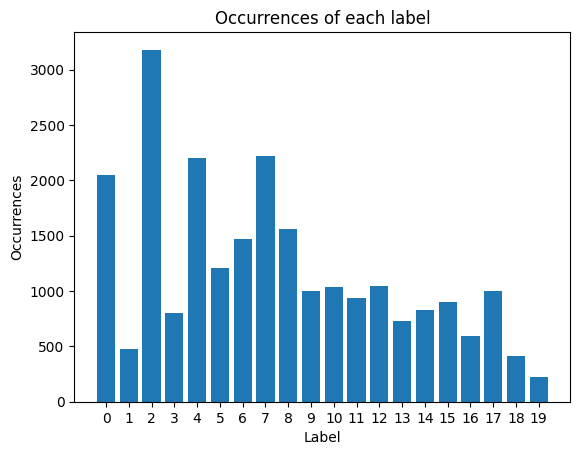

In [23]:
# Count the occurrences of each label at each index position
label_counts = np.sum(Y_train, axis=0)

# Generate x-axis positions for the bar plot
x = np.arange(len(label_counts))

# Plot the label occurrences at each index position
plt.bar(x, label_counts)

# Customize the plot
plt.xlabel("Label")
plt.ylabel("Occurrences")
plt.title("Occurrences of each label")

plt.xticks(x)

print(f"Total number of train documents {X_train.shape[0]}")
plt.show()


| Model | Technique | Avg Precision |Subset Accuracy |Params|
|------|------|------|------|------|
|   LogisticRegression  |   MultiOutputClassifier  |   0.63  |   0.04  |   -  |
|   LogisticRegression  |   ClassifierChain  |   0.64  |   0.05  |   -  |
|   LinearSVC  |   MultiOutputClassifier  |   0.61  |  0.07  |   -  |
|   LinearSVC  |   ClassifierChain  |  0.61  |   0.07  |   -  |
|   GradientBoostingClassifier  |   MultiOutputClassifier  |   0.61 |   0.07  |   (n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0) |
|   GradientBoostingClassifier  |   ClassifierChain  |   0.61  |  0.08  |   (n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)  |
|   GradientBoostingClassifier  |   ClassifierChain  |   0.67  |  0.10  |   ('base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 3, 'base_estimator__n_estimators': 200)  |
|   GradientBoostingClassifier  |   MultiOutputClassifier  |   0.67  |  0.09  |   (n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0)  |
|   GradientBoostingClassifier  |   ClassifierChain  |   0.67  |  0.10  |   (n_estimators=200, learning_rate=0.1, max_depth=3, random_state=0)  |
|   LinearSVC  |   ClassifierChain  |   0.63  |  0.08  |   ('base_estimator__base_estimator__C': 0.1, 'base_estimator__base_estimator__tol': 0.0001)  |
|   RandomForestClassifier  |   MultiOutputClassifier  |   0.69  |  0.08  |   ('estimator__max_features': 'auto', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200)  |
|   RandomForestClassifier  |   ClassifierChain  |   0.69  |  0.08  |   ('estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200)  |


Based on the information provided, it is evident that the dataset is imbalanced. The reason for the dataset being imbalanced is that it is more common for a document to be without a specific label rather than having that label. Furthermore, due to the limited availability of diverse training data, it becomes challenging to effectively capture the intricate relationships between input features and multiple labels. As a result, the model may encounter difficulties in generalizing well and achieving a high subset accuracy, as it lacks exposure to a wide range of examples that encompass the complexities of the problem.  

GradientBoostingClassifier and RandomForestClassifier leads to better results regarding both the average precision and the subset accuracy. 

By emphasizing misclassified instances and addressing the weaknesses of previous models, the GradientBoostingClassifier is capable of capturing intricate relationships between input features and labels. Consequently, it achieves improved subset accuracy by effectively addressing the complexities present in the dataset.

Furthermore, the RandomForestClassifier enhances subset accuracy by promoting diversity and mitigating overfitting through the random selection of feature subsets and samples for each tree. Its ability to handle high-dimensional data and capture intricate feature interactions makes it well-suited for achieving improved performance in capturing complex relationships within the dataset.